<a href="https://colab.research.google.com/github/bugeki/workshops/blob/main/Assignment_1_matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [6]:
kill = pd.read_csv('/PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [ ]:
kill.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [ ]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
# with matplotlib

a = kill.gender.value_counts().index
a

Index(['M', 'F'], dtype='object')

In [ ]:
b= kill.gender.value_counts().values
b

array([2428,  107])

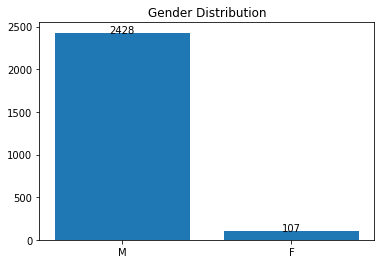

In [ ]:

fig, ax =plt.subplots(figsize=(6, 4))
ax.bar(a,b)
ax.set_title("Gender Distribution")
plt.text(0, b[0], b[0], horizontalalignment='center')
plt.text(1, b[1], b[1], horizontalalignment='center');

## 2: Plot 7 most common kill weapons

In [ ]:
kill['armed'].value_counts().sort_values(ascending=False).head()

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
Name: armed, dtype: int64

In [13]:
c=kill.armed.value_counts().head(7).index
c

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

In [14]:
d=kill.armed.value_counts().head(7).values
d

array([1398,  373,  177,  171,  117,  104,   18])

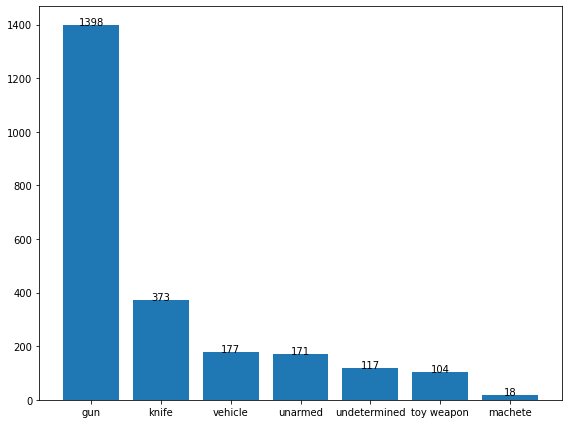

In [16]:
def labels(x,y):
  for i in range(len(x)):
            plt.text(i ,y[i] ,y[i],horizontalalignment='center',)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(c,d)
labels(c,d)
plt.tight_layout()

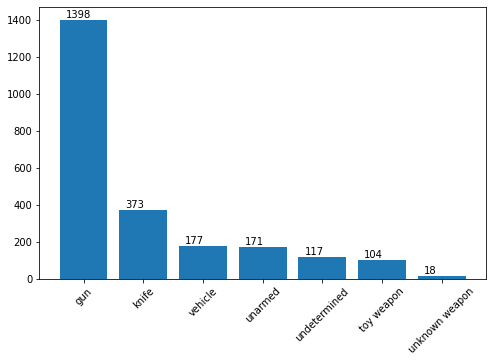

In [ ]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
kill['age_cat'] = np.where((kill['age'] > 25), 'above25', np.where((kill['age'] <=25), 'below25',"below25"))
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
kill['age_cat'].value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

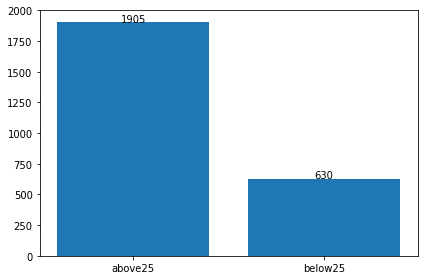

In [17]:
# with matplotlib
fig, ax = plt.subplots(figsize=(6,4))
ax.bar((kill.age_cat.value_counts().index), kill.age_cat.value_counts().values)
labels(kill.age_cat.value_counts().index, kill.age_cat.value_counts().values)
plt.tight_layout()

## 4: Plot number of killed poeple by race

In [ ]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

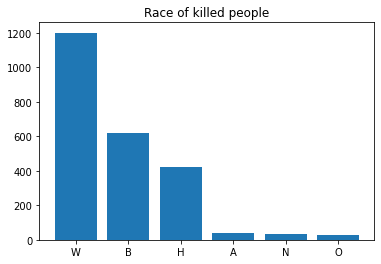

In [ ]:
# with matplotlib
fig, ax = plt.subplots(figsize=(6,4))
ax.bar((kill.race.value_counts().index), kill.race.value_counts().values)
ax.set_title("Race of killed people");

## 5: Killed People According to Races (Pie Chart)

In [6]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [29]:
kill['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [35]:
kill['race'].value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [8]:
kill.shape

(2535, 15)

In [9]:
kill.dropna(axis=0, inplace= True)

In [10]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by 

1.   Liste öğesi
2.   Liste öğesi

a Pie Chart (You can use Matplotlib)**

> Girintili blok



In [56]:
kill['race'].value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [89]:
kill['race'].unique()


array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [11]:
y=kill['race'].value_counts().index
y

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [12]:
p=kill['race'].value_counts().values
p

array([1168,  592,  401,   36,   29,   28])

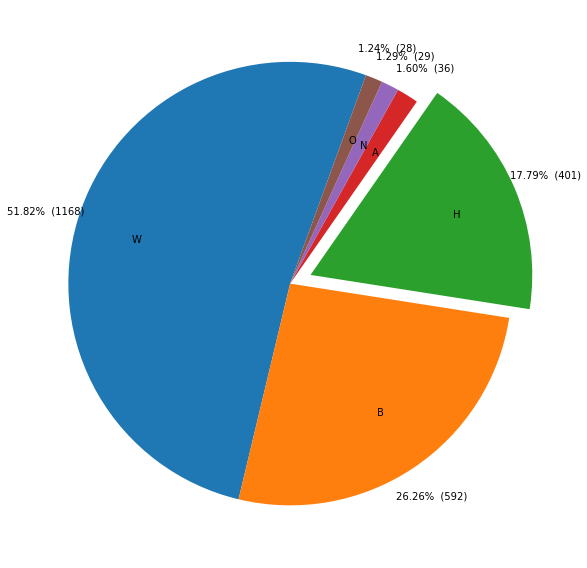

In [36]:
# matplotlib

plt.figure(figsize=(12, 8))
values = p
labels = y 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values), labeldistance=0.7, startangle=70, pctdistance=1.15, explode=explode_list)
plt.tight_layout()
plt.show()




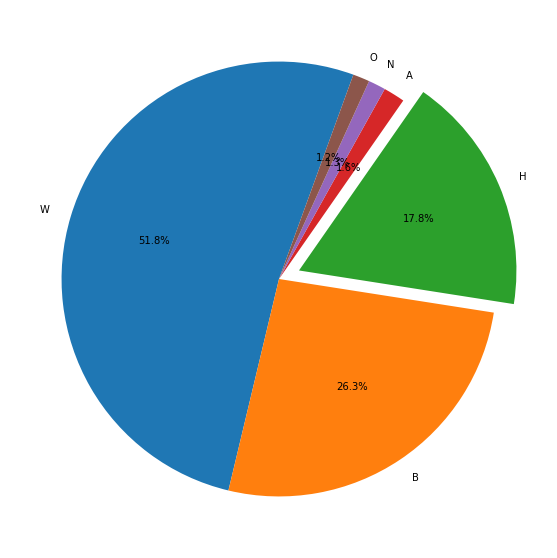